# TASK 3 IRIS FLOWER CLASSIFICATION

LIBRARIES

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
dataset = pd.read_csv('IRIS.csv')
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Exploring of dataset

In [6]:
print(dataset.head())
print(dataset.info())
print(dataset.describe())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

Data preprocessing

In [7]:
X = dataset.drop('species', axis=1)
y = dataset['species']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Visualizing the explored dataset

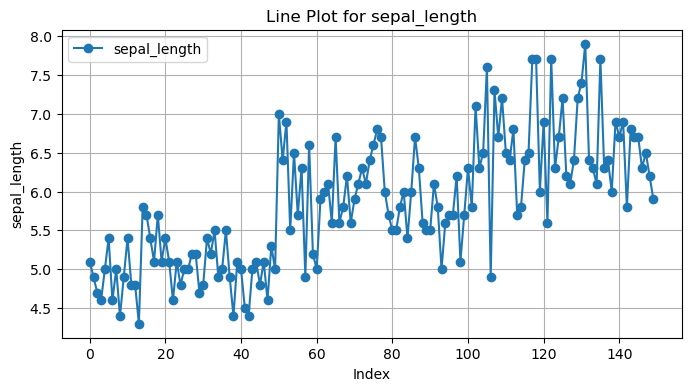

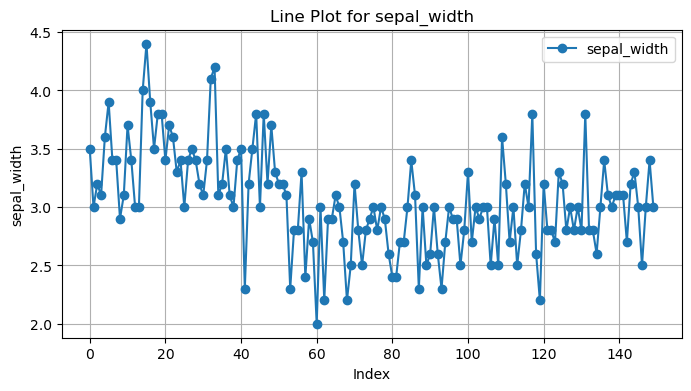

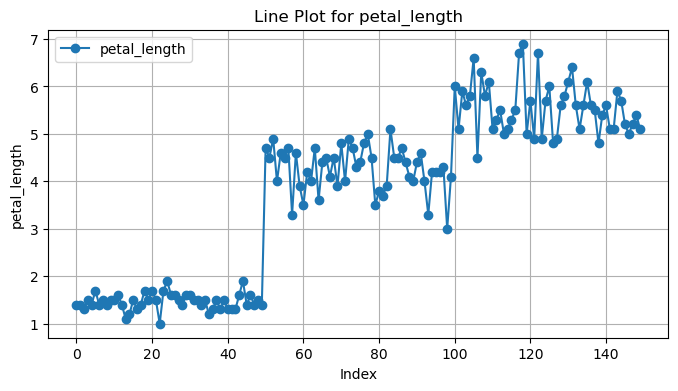

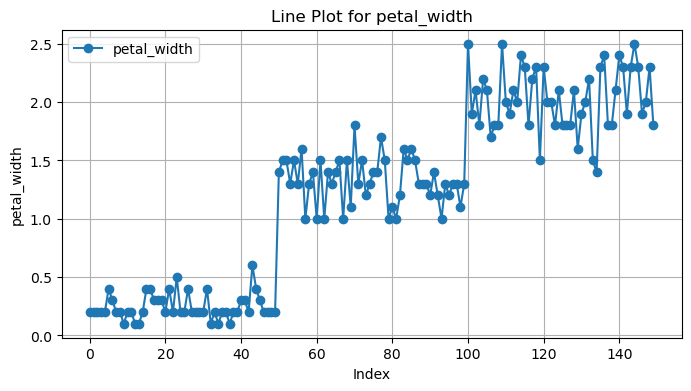

In [10]:
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.plot(dataset.index, dataset[column], marker='o', linestyle='-', markersize=6, label=column)
    plt.title(f'Line Plot for {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()


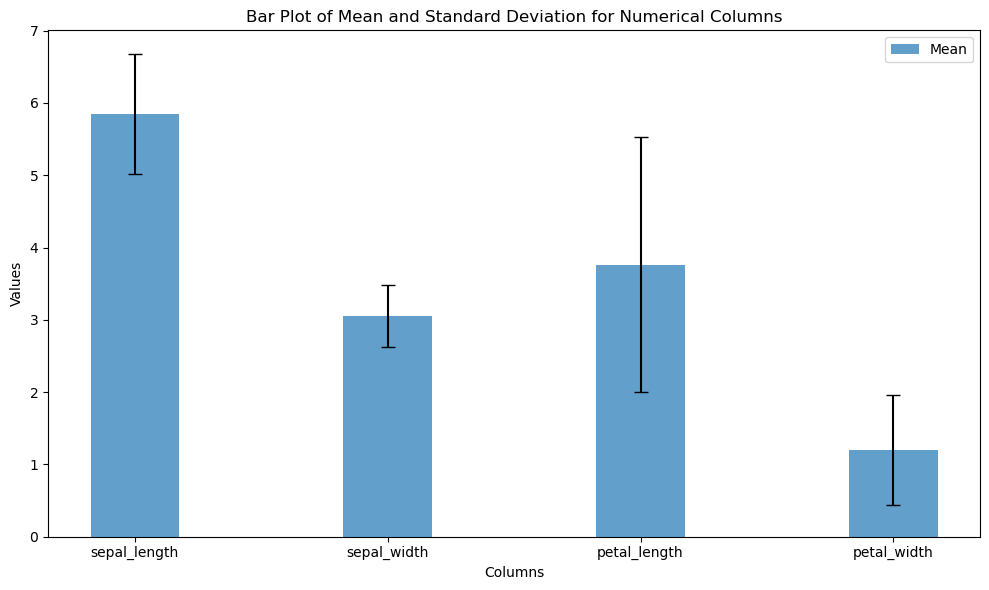

In [9]:
mean_values = dataset[numerical_columns].mean()
std_values = dataset[numerical_columns].std()
plt.figure(figsize=(10, 6))
x = range(len(numerical_columns))
width = 0.35

plt.bar(x, mean_values, width, label='Mean', yerr=std_values, capsize=5, alpha=0.7)
plt.xticks(x, numerical_columns)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Bar Plot of Mean and Standard Deviation for Numerical Columns')
plt.legend()
plt.tight_layout()
plt.show()


Machine Learning Model Building

In [11]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

Train 

In [12]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

Performing Prediction ANd Evaluation

In [13]:
y_pred_svm = svm_model.predict(X_test)

In [14]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nAccuracy:", accuracy_score(y_test, y_pred_svm))

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30


Accuracy: 0.9666666666666667


Visualizing prediction

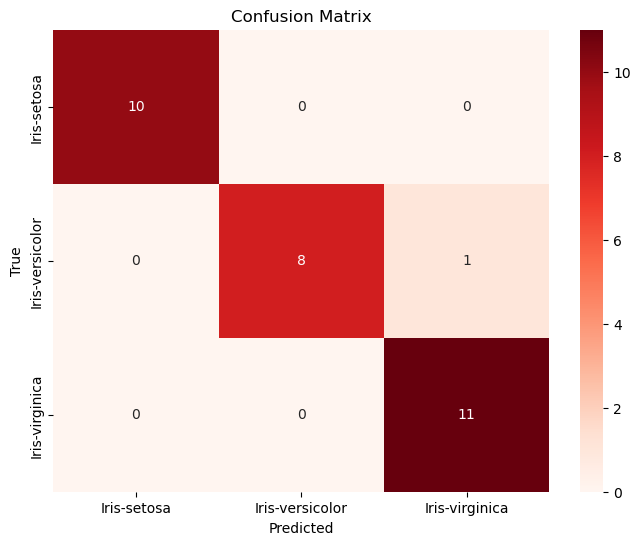

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

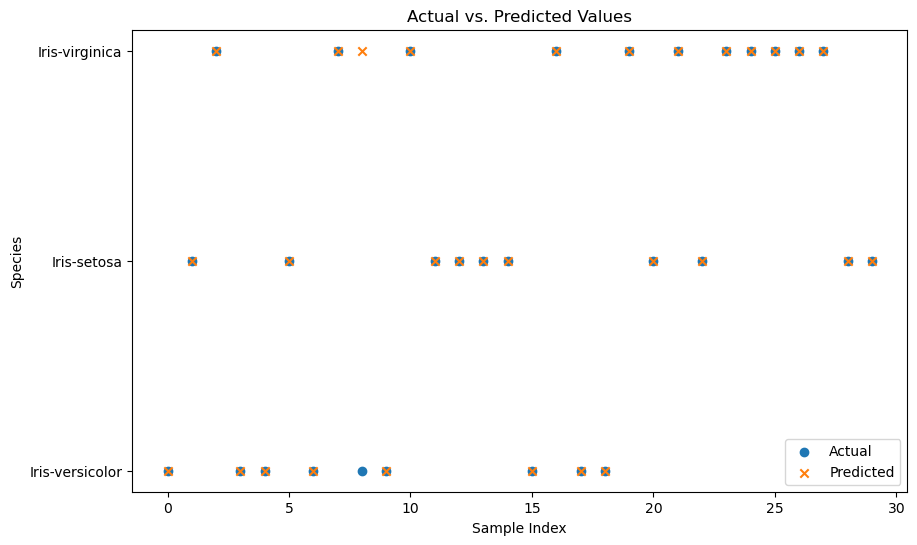

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o')
plt.scatter(range(len(y_test)), y_pred_svm, label='Predicted', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Species')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()